# Project 2 - Anime World

This project will focus on the Anime World dataset that is located in Kaggle (Source: https://www.bing.com/search?q=anime+world+kaggle+dataset&cvid=9d0778e274e745228de3a7bee33ae521&aqs=edge..69i57j69i59j69i65j69i60j5l3j69i64j69i60.3297j0j1&pglt=43&FORM=ANNTA1&PC=U531). Is a small dataset with a couple of columns and the research questions that this project is focusing on are mentioned below:

# Research Questions

### Research Question 1: What are the biggest Studios?
The word biggest is a bit vague but for the sake of this analysis we state that we refer to the total number of animes that it has produced. If it is above a certain number of animes, it is clasified as big studio. We will need further evidence though to tell what what is the threshold number.

### Research Question 2: What are the most active genres in production?
In this research question we will examine the most active genres in production of our database. A decision has to be made though on what is treated as most active genres from the ones we have. Also, there is a challenge. Some of those animes are categorized in more than one genre.

### Research Question 3: What are the most commonly used keywords for the Description feature?
For this research question we will use the description feature and try to create Word Clouds. This is a very exciting process and allows us to acquire some value and of course conduct further analysis if needed. We will run the Word Cloud three times, filtering out, each time, some words that might not give us much value.


In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("AnimeWorld.csv")
print(df.columns)
df1 = df.loc[:,['Anime','Genre', 'Description', 'Studio', 'Year', 'Rating']]
print ("The total rows of this dataset are: ",len(df1))
print ("The total rows of this dataset after removing the Null values are: ",len(df1.dropna()))

Index(['Unnamed: 0', 'Anime', 'Genre', 'Description', 'Studio', 'Year',
       'Rating'],
      dtype='object')
The total rows of this dataset are:  1005
The total rows of this dataset after removing the Null values are:  97


##### The below result, after the removal of NaNs, means that there is no reason to make a prediction of rating as the sample of rated animes is just 97 out of 1005. As such, we will drop the rating column.

In [2]:
df1 = df.loc[:,['Anime','Genre', 'Description', 'Studio', 'Year']]
print ("The dataset looks like this: ")
df1.head(5)

The dataset looks like this: 


,Anime,Genre,Description,Studio,Year
0,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,"['Drama', 'Fantasy', 'Suspense']",A reunion that was supposed to spell the arriv...,White Fox,"Jul 8, 2020"
1,"Kanojo, Okarishimasu","['Comedy', 'Romance']",Kazuya Kinoshita is a 20-year-old college stud...,TMS Entertainment,"Jul 11, 2020"
2,The God of High School,"['Action', 'Fantasy', 'Sci-Fi', 'Supernatural']","The ""God of High School"" tournament has begun,...",MAPPA,"Jul 6, 2020"
3,Maou Gakuin no Futekigousha: Shijou Saikyou no...,"['Action', 'Fantasy']","In the distant past, a war between humans and ...",SILVER LINK.,"Jul 4, 2020"
4,Enen no Shouboutai: Ni no Shou,"['Action', 'Supernatural']",After his confrontation in the Nether with his...,David Production,"Jul 4, 2020"


## Research Question 1: What are the biggest Studios?
The word biggest is a bit vague but for the sake of this analysis we state that we refer to the total number of animes that it has produced. If it is above a certain number of animes, it is clasified as big studio. We will need further evidence though to tell what what is the threshold number.


In [3]:
print(df1['Studio'].value_counts().head(5))

A-1 Pictures         38
J.C.Staff            35
Studio Deen          31
OLM                  29
TMS Entertainment    27
Name: Studio, dtype: int64


In [4]:
# If we print the first 30 rows we will notice that those have made at least 10 animes. 
df_include = df1['Studio'].value_counts()[0:30]
df_exclude = df1['Studio'].value_counts()[30::]

# Note for own reference: remember to change the df_include to df_exclude if needed.
df2 = df_include.index.to_list()

In [5]:
print ("The total number of studios that is being examined in this research question is: ",len(df2))
print ("")
print ("These studios are: ",df2)

The total number of studios that is being examined in this research question is:  30

These studios are:  ['A-1 Pictures', 'J.C.Staff', 'Studio Deen', 'OLM', 'TMS Entertainment', 'DLE', 'Doga Kobo', 'Madhouse', 'SILVER LINK.', 'MAPPA', 'Lerche', 'Kachidoki Studio', 'Toei Animation', 'LIDENFILMS', 'Bones', 'Pierrot', 'Diomedéa', 'Bandai Namco Pictures', 'Production I.G', 'Satelight', 'Sunrise', "Brain's Base", 'P.A. Works', 'feel.', 'Tatsunoko Production', 'Zero-G', '8bit', 'Wit Studio', 'David Production', 'Project No.9']


In [6]:
len(df1.loc[df['Studio'].isin(df2)])

524

In [8]:
# We create a new dataset for plotting purposes
lista = []
listb = []

for items in df2:
    lista.append(items)

for items in (df1['Studio'].value_counts()[0:30]):
    listb.append(items)
    
df_visuals = pd.DataFrame()
df_visuals["Studios"] = lista
df_visuals["Total Anime Produced"] = listb
df_visuals.head(5)

,Studios,Total Anime Produced
0,A-1 Pictures,38
1,J.C.Staff,35
2,Studio Deen,31
3,OLM,29
4,TMS Entertainment,27


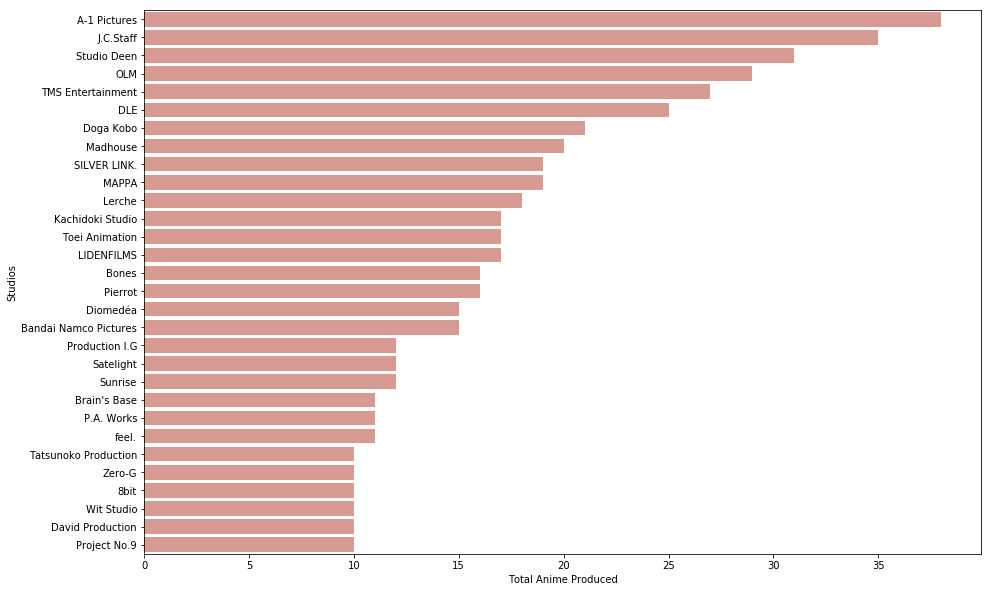

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Total Anime Produced", y="Studios", data=df_visuals,color="salmon", saturation=.5)


In [11]:
# We filter in only the studios we want. df2 dataset contains only those studios we want.
df_filtered = df1.loc[df['Studio'].isin(df2)]
df_filtered.head(5)

,Anime,Genre,Description,Studio,Year
1,"Kanojo, Okarishimasu","['Comedy', 'Romance']",Kazuya Kinoshita is a 20-year-old college stud...,TMS Entertainment,"Jul 11, 2020"
2,The God of High School,"['Action', 'Fantasy', 'Sci-Fi', 'Supernatural']","The ""God of High School"" tournament has begun,...",MAPPA,"Jul 6, 2020"
3,Maou Gakuin no Futekigousha: Shijou Saikyou no...,"['Action', 'Fantasy']","In the distant past, a war between humans and ...",SILVER LINK.,"Jul 4, 2020"
4,Enen no Shouboutai: Ni no Shou,"['Action', 'Supernatural']",After his confrontation in the Nether with his...,David Production,"Jul 4, 2020"
5,Yahari Ore no Seishun Love Comedy wa Machigatt...,"['Comedy', 'Romance']","Resolved to become a more independent person, ...",feel.,"Jul 10, 2020"


## Research Question 2: What are the most active genres in production?
We have to split the column "Genre" to different number of columns before making a decision on what are genres with the most productions in the anime industry for the studios of this database.

In [12]:
print (df_filtered["Genre"].head(5))

1                              ['Comedy', 'Romance']
2    ['Action', 'Fantasy', 'Sci-Fi', 'Supernatural']
3                              ['Action', 'Fantasy']
4                         ['Action', 'Supernatural']
5                              ['Comedy', 'Romance']
Name: Genre, dtype: object


In [14]:
df_genres = pd.DataFrame(df_filtered["Genre"].str.split(',').fillna('[]').tolist())
print ("The dataset looks like this: ")
df_genres.head(10)

The dataset looks like this: 


,0,1,2,3,4,5
0,['Comedy','Romance'],None,None,None,None
1,['Action','Fantasy','Sci-Fi','Supernatural'],None,None
2,['Action','Fantasy'],None,None,None,None
3,['Action','Supernatural'],None,None,None,None
4,['Comedy','Romance'],None,None,None,None
5,['Action','Adventure','Mystery'],None,None,None
6,['Action','Adventure','Fantasy'],None,None,None
7,['Action','Comedy','Supernatural','Ecchi'],None,None
8,['Action','Drama','Sci-Fi'],None,None,None
9,['Mystery','Romance','Sci-Fi'],None,None,None


In [15]:
print(df_genres[1].value_counts().head())

 'Adventure'         54
 'Comedy'            41
 'Slice of Life']    37
 'Drama'             31
 'Fantasy'           29
Name: 1, dtype: int64


In [16]:
# Removal of some apostrophes and square brackets - cleaning the dataset
df_merged = pd.Series(df_genres.values.ravel('F'))
df_merged = df_merged.str.strip('[]\]\[ \' \t')
df_merged = df_merged.value_counts()
df_merged.head(5)

Comedy           222
Action           190
Fantasy          127
Drama            101
Slice of Life     87
dtype: int64

In [17]:
df_genres = df_merged.index.to_list()

listc = []
listd = []

for items in df_merged:
    listc.append(items)

for items in (df_genres):
    listd.append(items)
    
df_visuals = pd.DataFrame()
df_visuals["Genres"] = listd
df_visuals["Total Count"] = listc
df_visuals

,Genres,Total Count
0,Comedy,222
1,Action,190
2,Fantasy,127
3,Drama,101
4,Slice of Life,87
5,Adventure,83
6,Romance,82
7,Supernatural,80
8,Sci-Fi,70
9,Mystery,38


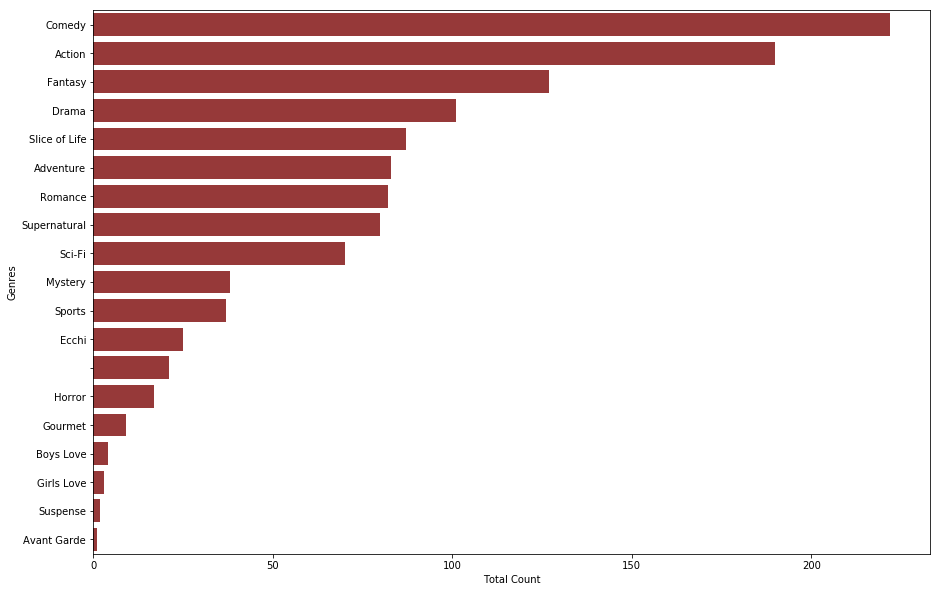

In [19]:
# Plotting the genres

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Total Count", y="Genres", data=df_visuals,color="brown")

## Research Question 3: What are the most commonly used keywords for the Description feature?

For this research question we will use word cloud after cleaning a bit the description feature of t=our database. We will run the cloud 3x times in order to avoid commonly used words (stopwords) such as "will", "must" and more.


In [20]:
print (df_filtered["Description"].head(5))

1    Kazuya Kinoshita is a 20-year-old college stud...
2    The "God of High School" tournament has begun,...
3    In the distant past, a war between humans and ...
4    After his confrontation in the Nether with his...
5    Resolved to become a more independent person, ...
Name: Description, dtype: object


In [21]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

data = df_filtered["Description"]
print(data.head())

1    Kazuya Kinoshita is a 20-year-old college stud...
2    The "God of High School" tournament has begun,...
3    In the distant past, a war between humans and ...
4    After his confrontation in the Nether with his...
5    Resolved to become a more independent person, ...
Name: Description, dtype: object


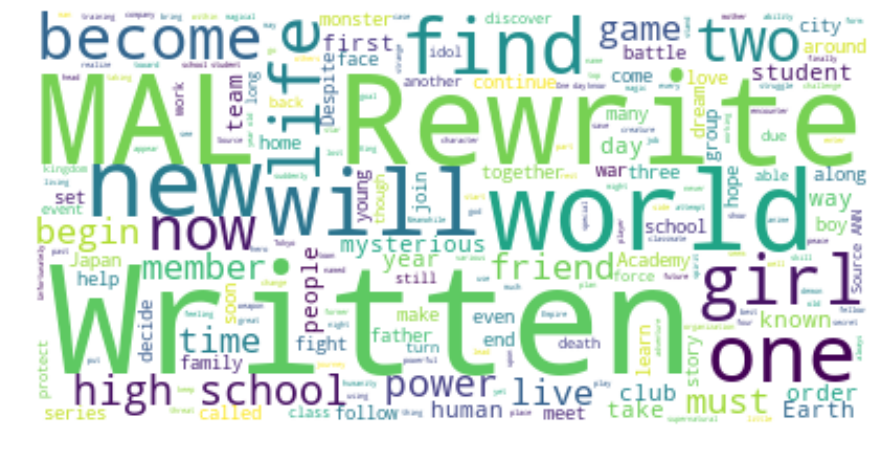

In [22]:
text = " ".join(i for i in data)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

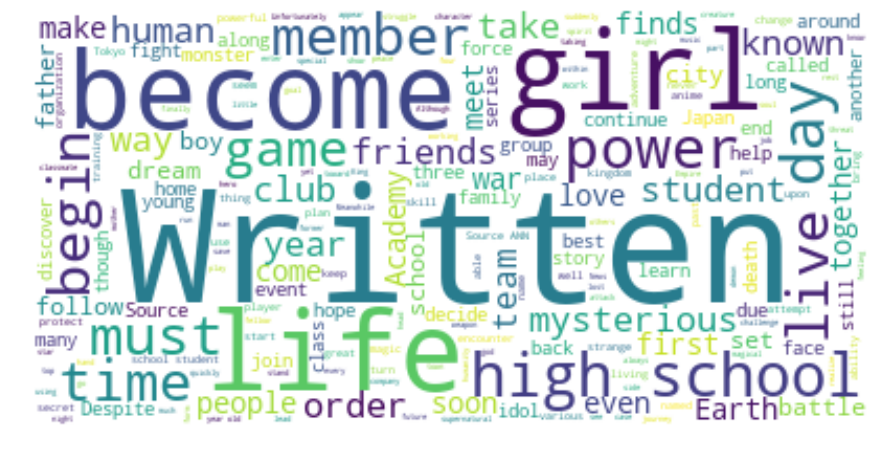

In [23]:
stopwords.update(["find", 'world', "Rewrite", "MAL","two", 'now', "new", "friend","will", "one"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



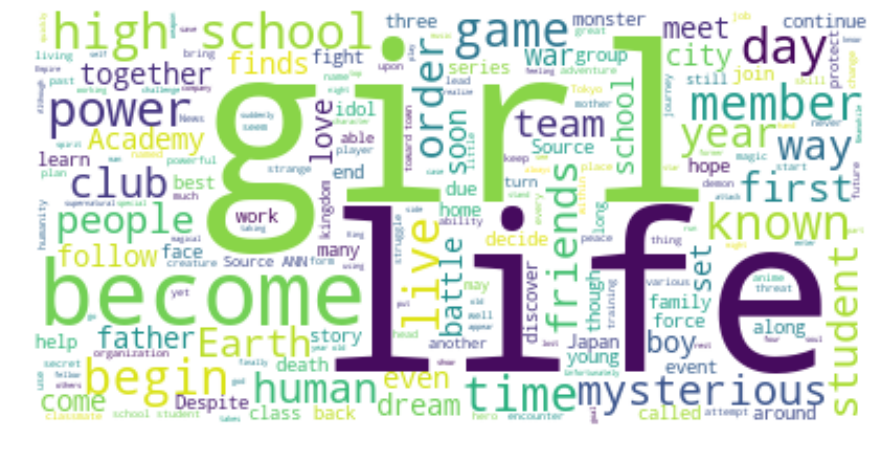

In [25]:
stopwords.update(["must", 'Written', "Rewrite", "take","make"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



This was a superficial analysis, only to view some of the keywords that are being used mostly in the description of the animes. Some keywords could help us understand what keywords are being used in most of animes. For example, it seems that many of them speak about the common life, they seem to have some tendency to contain female characters more and there is a tendency to change / becoming something different. Again,that is a very superficial conlusion but in a way it makes sense.